### Change Point Detection using Bollinger Band 

In [185]:
%matplotlib inline
import changefinder
import pandas as pd 
from datetime import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import os


def str2datetime(tstr):
    if tstr.__class__.__name__ == "datetime":
        return tstr
    ts = tstr.split(".")[0]
    return dt.strptime(ts, "%Y/%m/%d %H:%M")

def calc_bb(name, df, window=36):
    # Bollinger Band using 2sigma
    plt.figure(figsize=(25,5))
    plt.title(name)
    plt.plot(df.index, df[name])
    
    m_ave = df[name].rolling(window=12).mean() #moving average using 12 hours window
    m = df[name].rolling(window=window).mean()
    sigma = df[name].rolling(window=window).std()
    
    df["m"] = m
    df["m+2s"] = m+2*sigma
    df["m-2s"] = m-2*sigma
    
    #df["up"] = df[name] - df["m+2s"]
    #df["down"] = df["m-2s"] - df[name]
    
    df["up"] = m_ave - df["m+2s"]
    df["down"] = df["m-2s"] - m_ave
    
    plt.plot(df.index,m,label="{}hour average".format(window*1), color='orange')
    plt.plot(df.index,m+2*sigma,label="$+2\sigma$",color="k",alpha=0.8,linestyle="dotted")
    plt.plot(df.index,m-2*sigma,label="$-2\sigma$",color="k",alpha=0.8,linestyle="dotted")
    plt.plot(df.index,m_ave,label="mov ave window = 12 hour",color="green",alpha=0.4)
#   plt.plot(df.index, df[name].rolling(window=3*window).mean(),label="{}min".format(window*30))

    for i in range(1,len(df)):
        if df.iloc[i-1]["up"] < 0 and df.iloc[i]["up"] >= 0:
            print("change point increase time:{}".format(df.iloc[i]["timestamp"]))
            plt.plot(df.index[i],df.iloc[i][name],"o",color="red",markersize=6)
        if df.iloc[i-1]["down"] < 0 and df.iloc[i]["down"] >= 0:
            print("change point decrease time:{}".format(df.iloc[i]["timestamp"]))
            plt.plot(df.index[i],df.iloc[i][name],"o",color="blue",markersize=6)
    
    plt.legend(loc=2)
    plt.show()
      

### Cow ID 49098
#### 1 week before calving data

change point increase time:2019/07/06 14:00
change point increase time:2019/07/06 17:00
change point increase time:2019/07/07 0:00
change point increase time:2019/07/07 3:00
change point decrease time:2019/07/07 10:00
change point decrease time:2019/07/07 15:00
change point increase time:2019/07/07 18:00
change point decrease time:2019/07/07 20:00
change point increase time:2019/07/07 23:00
change point decrease time:2019/07/08 10:00
change point decrease time:2019/07/08 16:00
change point increase time:2019/07/08 20:00
change point increase time:2019/07/09 3:00
change point decrease time:2019/07/09 10:00
change point decrease time:2019/07/09 13:00
change point increase time:2019/07/09 22:00
change point increase time:2019/07/10 4:00
change point decrease time:2019/07/10 11:00
change point increase time:2019/07/10 16:00
change point increase time:2019/07/10 20:00
change point decrease time:2019/07/11 1:00
change point increase time:2019/07/11 4:00
change point decrease time:2019/07/11 

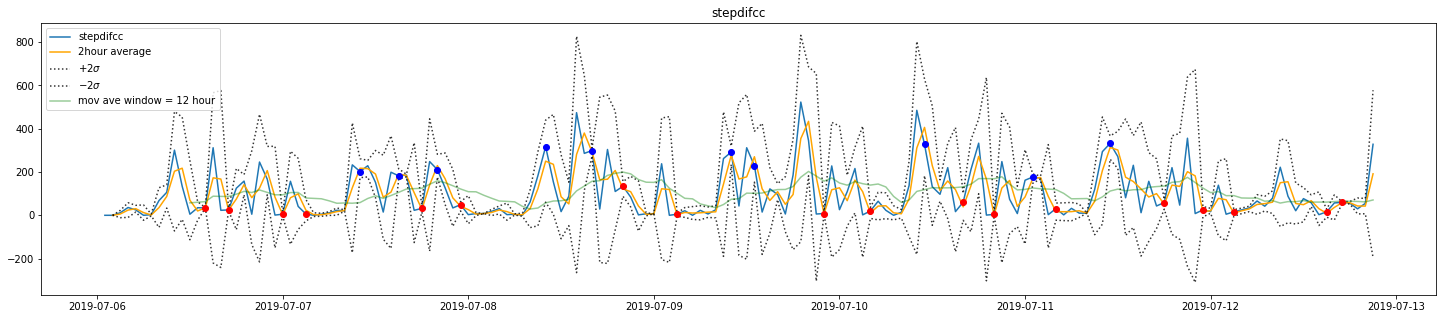

In [186]:
df = pd.read_csv("13_49098_2019-07-05~2019-07-12.csv").dropna()
df = df.rename(columns={'datetime_x': 'timestamp'})
df.index = df.timestamp.apply(str2datetime)

calc_bb("stepdifcc", df, window=2)

### Cow ID 31968 
#### 1 week before calving data

change point increase time:2019/09/10 19:00
change point increase time:2019/09/10 23:00
change point increase time:2019/09/11 4:00
change point decrease time:2019/09/11 11:00
change point decrease time:2019/09/11 13:00
change point decrease time:2019/09/11 16:00
change point increase time:2019/09/11 18:00
change point increase time:2019/09/12 1:00
change point decrease time:2019/09/12 12:00
change point increase time:2019/09/12 17:00
change point decrease time:2019/09/12 19:00
change point increase time:2019/09/12 23:00
change point increase time:2019/09/13 2:00
change point increase time:2019/09/13 7:00
change point decrease time:2019/09/13 11:00
change point increase time:2019/09/13 15:00
change point decrease time:2019/09/13 17:00
change point increase time:2019/09/14 2:00
change point decrease time:2019/09/14 11:00
change point decrease time:2019/09/14 16:00
change point decrease time:2019/09/14 18:00
change point increase time:2019/09/14 20:00
change point increase time:2019/09/15

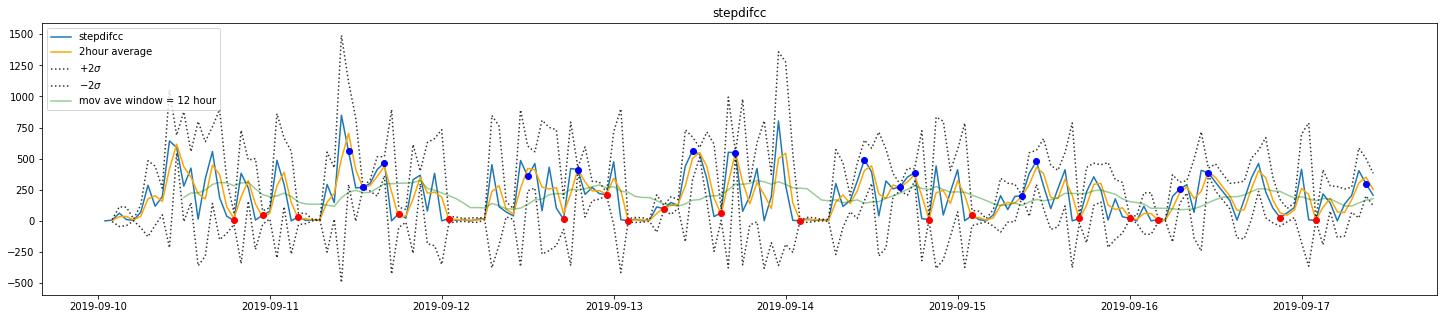

In [187]:
df = pd.read_csv("21_31968_2019-09-10~2019-09-17.csv").dropna()
df = df.rename(columns={'datetime_x': 'timestamp'})
df.index = df.timestamp.apply(str2datetime)

calc_bb("stepdifcc", df, window=2)


### Cow ID 94263
#### 2 weeks before calving data

change point increase time:2019/09/03 0:00
change point increase time:2019/09/03 4:00
change point increase time:2019/09/03 16:00
change point decrease time:2019/09/03 21:00
change point increase time:2019/09/04 2:00
change point decrease time:2019/09/04 9:00
change point decrease time:2019/09/04 11:00
change point increase time:2019/09/05 1:00
change point decrease time:2019/09/05 11:00
change point increase time:2019/09/05 15:00
change point increase time:2019/09/06 1:00
change point increase time:2019/09/06 19:00
change point decrease time:2019/09/06 23:00
change point increase time:2019/09/07 3:00
change point decrease time:2019/09/07 10:00
change point increase time:2019/09/07 18:00
change point increase time:2019/09/07 20:00
change point increase time:2019/09/08 3:00
change point decrease time:2019/09/08 11:00
change point increase time:2019/09/08 13:00
change point increase time:2019/09/08 17:00
change point decrease time:2019/09/08 23:00
change point increase time:2019/09/09 1:

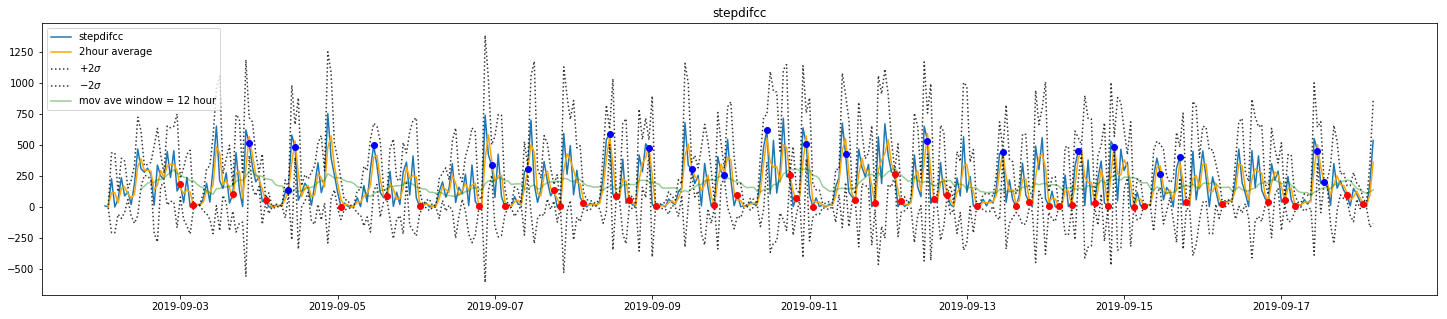

In [188]:
df = pd.read_csv("5_94263_2019-08-29~2019-09-18.csv").dropna()
df = df.rename(columns={'datetime_x': 'timestamp'})
df.index = df.timestamp.apply(str2datetime)

calc_bb("stepdifcc", df, window=2)
